<h1>APPENDIX - CODE FOR THE DATA SCIENCE PROJECT</h1>

<h3>I will use the database of the EXOplanet.eu catalogue <a href=https://exoplanet.eu/catalog/ >https://exoplanet.eu/catalog/</a>. One could also use the NASA Exoplanet Archive (<a href=https://exoplanetarchive.ipac.caltech.edu/ >https://exoplanetarchive.ipac.caltech.edu/</a>), but, while more comprehensive in the visualization it offers in-site, it makes the data treatment harder, as it has more than one value for the same object, making it costlier and more time consuming to analyse, unless we treated each measurement as a different object.</h3>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.stats import linregress

<h2>2D SCATTER AND VISUALIZATION</h2>

<h3>Mass and Orbital Period</h3>
<h4>Lets start by retrieving the data and plotting the orbital period and mass of detected objects:</h4>

In [3]:
mass_period = open("mass_period.csv",'r')
Lines_m = mass_period.readlines()
mass_period.close()

Labels_m=Lines_m[0].split(',')
Data_m=[Lines_m[i].split(',') for i in range(1,len(Lines_m))]

mass_m = Labels_m.index('mass') #Jupiter Masses
name_m = Labels_m.index('name') #index of the name column
period_m = Labels_m.index('orbital_period') #days
detection_m = Labels_m.index('detection_type')

Detection_m=[]
for j in Data_m:
    if j[detection_m] not in Detection_m and j[detection_m][1::] not in Detection_m: #sometimes the detection type begins with quotation marks
        Detection_m.append(j[detection_m])                                         #which appends unwanted detection types
        
Detection_m.sort()
print(Detection_m)

['Astrometry', 'Imaging', 'Microlensing', 'Other', 'Primary Transit', 'Radial Velocity', 'TTV', 'Timing']


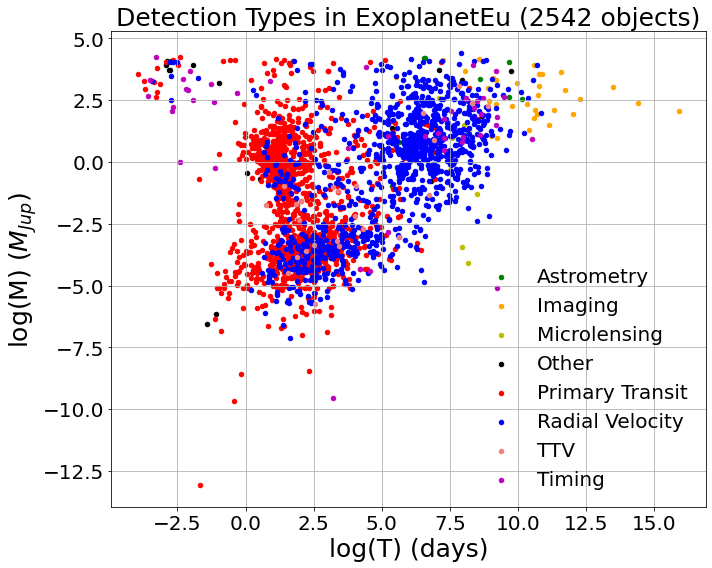

In [10]:
plt.figure(figsize=(10,8))

LC_m=['green','orange','y','k','red','blue','lightcoral','m']
index=0
objects=0

for type in Detection_m:
    M=[]
    T=[]
    for planet in Data_m:
        if planet[detection_m]==type:
            M.append(np.log(float(planet[mass_m])))
            T.append(np.log(float(planet[period_m])))
            objects+=1
       
    plt.scatter(T,M,s=20,label=type,c=LC_m[index],marker='o')
    index+=1
    plt.legend(loc='lower right',fontsize=20, framealpha=0)

plt.title("Detection Types in ExoplanetEu ("+str(objects)+" objects)",fontsize=25)
plt.ylabel(r"log(M) ($M_{Jup}$)",fontsize=25)
plt.xlabel(r"log(T) (days)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig("ExoEU_Mass_Period.jpg")
plt.show()

<h3>Radius and Orbital Period</h3>

In [7]:
radius_period = open("radius_period.csv",'r')
Lines_r = radius_period.readlines()
radius_period.close()

Labels_r=Lines_r[0].split(',')
Data_r=[Lines_r[i].split(',') for i in range(1,len(Lines_r))]

radius_r = Labels_r.index('radius') #Jupiter Radii
name_r = Labels_r.index('name') #index of the name column
period_r = Labels_r.index('orbital_period') #days
detection_r = Labels_r.index('detection_type')

Detection_r=[]
for j in Data_r:
    if j[detection_r] not in Detection_r and j[detection_r][1::] not in Detection_r: #sometimes the detection type begins with quotation marks
        Detection_r.append(j[detection_r])                                         #which appends unwanted detection types
        
Detection_r.sort()
Detection_r

['Imaging', 'Other', 'Primary Transit', 'Radial Velocity', 'TTV', 'Timing']

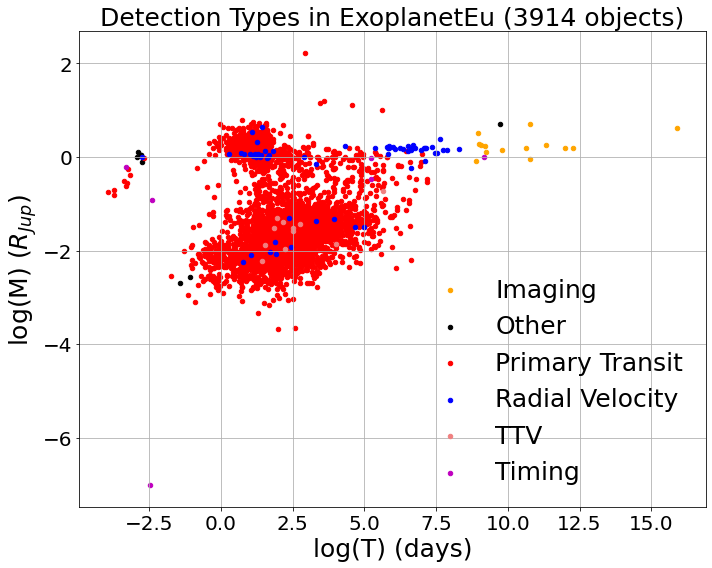

In [11]:
plt.figure(figsize=(10,8))

LC_r=['orange','k','red','blue','lightcoral','m']
index=0
objects=0

for type in Detection_r:
    R=[]
    T=[]
    for planet in Data_r:
        if planet[detection_r]==type:
            R.append(np.log(float(planet[radius_r])))
            T.append(np.log(float(planet[period_r])))
            objects+=1
       
    plt.scatter(T,R,s=20,label=type,c=LC_r[index],marker='o')
    index+=1
    plt.legend(loc='lower right',fontsize=25, framealpha=0)

plt.title("Detection Types in ExoplanetEu ("+str(objects)+" objects)",fontsize=25)
plt.ylabel(r"log(M) ($R_{Jup}$)",fontsize=25)
plt.xlabel(r"log(T) (days)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig("ExoEU_Radius_Period.jpg")
plt.show()

<h2>3D SCATTER AND VISUALIZATION</h2>

In [13]:
mass_radius_period = open("mass_radius_period.csv",'r')
Lines_mr = mass_radius_period.readlines()
mass_radius_period.close()

Labels_mr=Lines_mr[0].split(',')
Data_mr=[Lines_mr[i].split(',') for i in range(1,len(Lines_mr))]

mass_mr = Labels_mr.index('mass') #Jupiter Masses
radius_mr = Labels_mr.index('radius') #Jupiter Radii
name_mr = Labels_mr.index('name') #index of the name column
period_mr = Labels_mr.index('orbital_period') #days
detection_mr = Labels_mr.index('detection_type')

Detection_mr=[]
for j in Data_mr:
    if j[detection_mr] not in Detection_mr and j[detection_mr][1::] not in Detection_mr: #sometimes the detection type begins with quotation marks
        Detection_mr.append(j[detection_mr])                                         #which appends unwanted detection types
        
Detection_mr.sort()
Detection_mr

['Imaging', 'Other', 'Primary Transit', 'Radial Velocity', 'TTV', 'Timing']

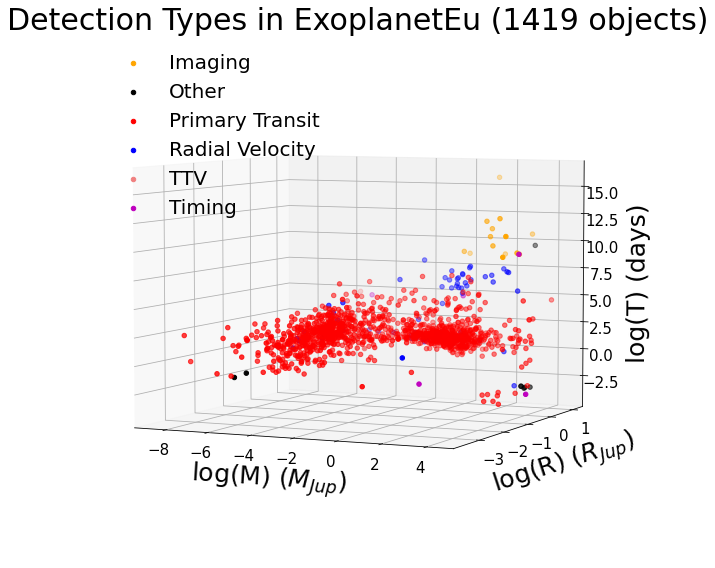

No handles with labels found to put in legend.


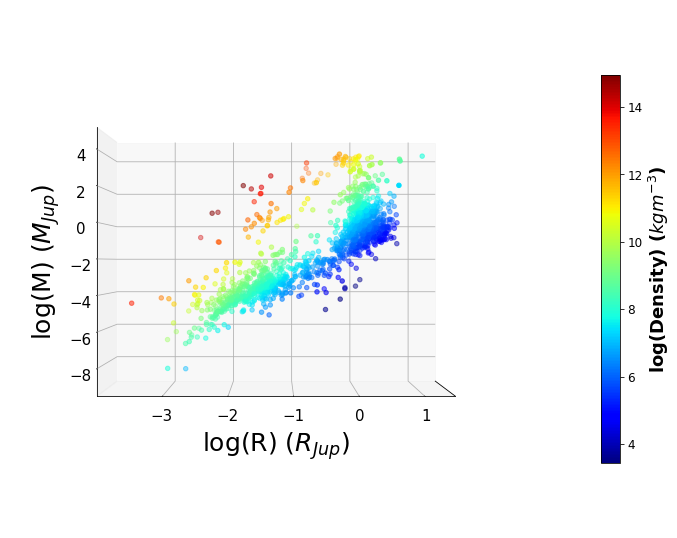

In [14]:
from mpl_toolkits import mplot3d 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

LC_mr=['orange','k','red','blue','lightcoral','m']
index=0
objects=0

for type in Detection_mr:
    M=[]
    R=[]
    T=[]
    for planet in Data_mr:
        if planet[detection_mr]==type:
            M.append(np.log(float(planet[mass_mr])))
            R.append(np.log(float(planet[radius_mr])))
            T.append(np.log(float(planet[period_mr])))
            objects+=1
       
    ax.scatter(M,R,T,s=20,label=type,c=LC_mr[index],marker='o')
    index+=1
    ax.legend(fontsize=20,loc='upper left',framealpha=0)

plt.title("Detection Types in ExoplanetEu ("+str(objects)+" objects)",fontsize=30)
ax.set_xlabel(r"log(M) ($M_{Jup}$)",fontsize=25, labelpad=15)
ax.set_ylabel(r"log(R) ($R_{Jup}$)",fontsize=25, labelpad=15)
ax.set_zlabel(r"log(T) (days)",fontsize=25, labelpad=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params('major',labelsize=15)

plt.tight_layout()
plt.grid()
plt.savefig("ExoEU_3D.jpg")
ax.view_init(5, -65)
plt.show()



######################################

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
objects=0

Mj = 1.9*10**27 #kg
Rj= 7*10**7 #m

M=[]
R=[]
T=[]
Density=[]
for planet in Data_mr:
    M.append(np.log(float(planet[mass_mr])))
    R.append(np.log(float(planet[radius_mr])))
    T.append(np.log(float(planet[period_mr])))
    Density.append(np.log((3*float(planet[mass_mr])*Mj)/(4*np.pi*((float(planet[radius_mr])*Rj)**3))))
    objects+=1
       
scatter = ax.scatter(T,R,M,s=20,c=Density,marker='o',cmap='jet')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label(r'log(Density) ($kg m^{-3}$)', size=18, weight='bold')
cbar.ax.tick_params(labelsize=12)
ax.legend(fontsize=15,loc='upper left',framealpha=0)

#plt.title("Detection Types in ExoplanetsEu ("+str(objects)+" objects)",fontsize=30)
ax.set_zlabel(r"log(M) ($M_{Jup}$)",fontsize=25, labelpad=15)
ax.set_ylabel(r"log(R) ($R_{Jup}$)",fontsize=25, labelpad=25)
#ax.set_xlabel(r"log(T) (days)",fontsize=25, labelpad=15)
ax.xaxis.set_ticks([])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params('major',labelsize=15)


plt.tight_layout()
plt.grid()
ax.view_init(0, 0)
plt.savefig("Density_3D.jpg")
plt.show()

<h2>MASS CLUSTERING 2D</h2>

<h4>Let us implement clustering methods for the mass_period dataset, and, firstly, check how many clusters we should use to train and test our model.</h4>

<h3>K-MEANS</h3>

In [16]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.cluster import k_means

In [17]:
from collections import OrderedDict

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

<h4>We will need to initialize k-means, so we'll make a guess that the real number of clusters is 3. After this initialization, we will use the 'Elbow' technique to see if we were right.</h4> 

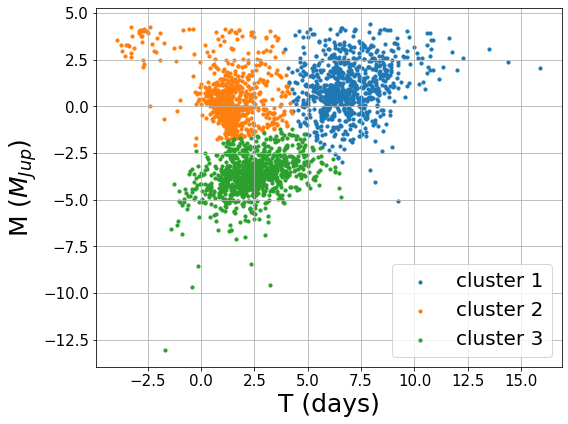

In [18]:
Mass=[np.log(float(i[mass_m])) for i in Data_m]
Period=[np.log(float(j[period_m])) for j in Data_m]

X_m = np.array([[Period[i],Mass[i]] for i in range(len(Mass))])
xcenter, ypred, _ = k_means(X_m,n_clusters=3, random_state=42)  

Xdict = {}
plt.figure(figsize=(8,6))
for y in np.unique(ypred):
    pos = (y==ypred)
    Xdict[y]=X_m[pos] # store for later
    plt.scatter(X_m[pos,0], X_m[pos,1], label='cluster %i'%(y+1),s=10)

plt.ylabel(r"M ($M_{Jup}$)",fontsize=25)
plt.xlabel(r"T (days)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig("K-Means.jpg")
plt.show()


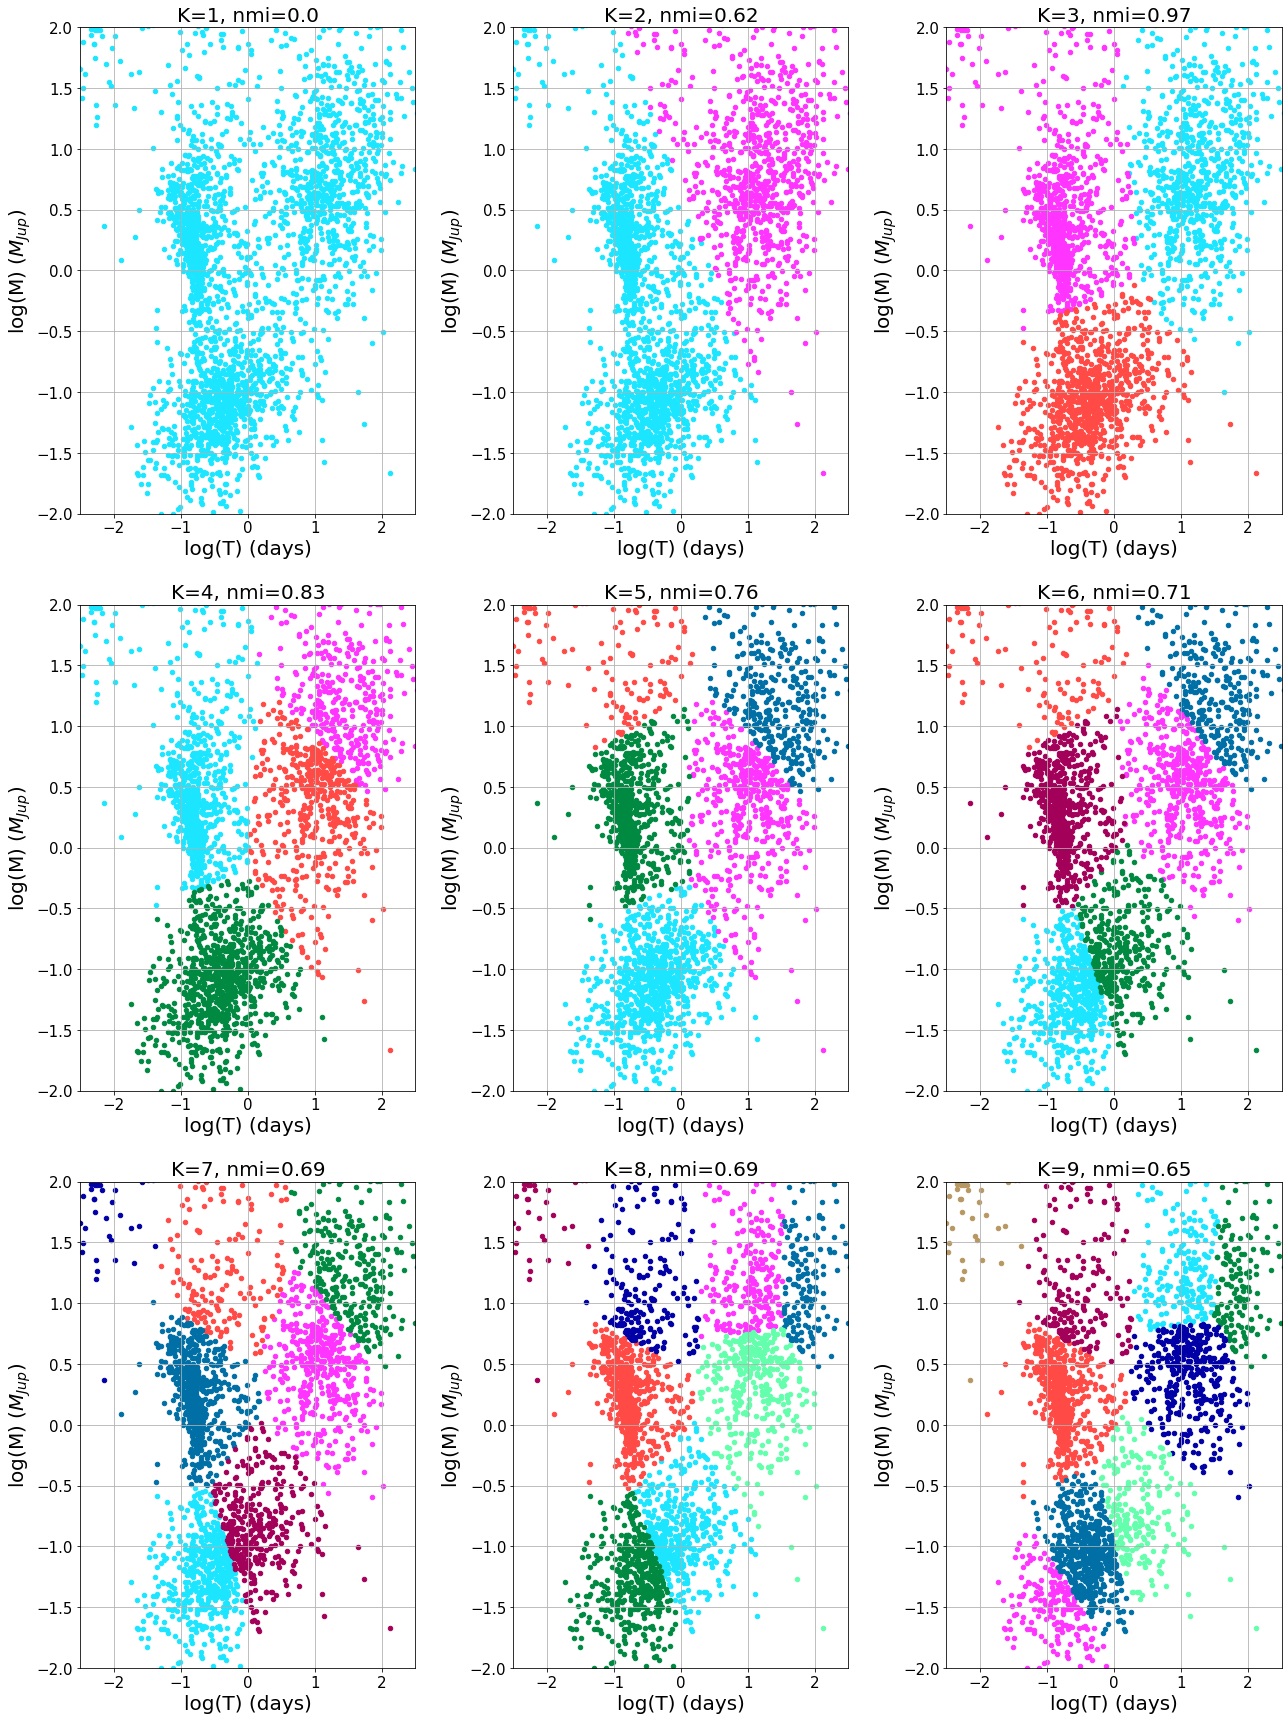

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def plotting_ax(X, y, ax, fontsize=12):
    # plotting function
    cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", 
                "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693",
                "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", 
                "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=20)
        ax.tick_params(axis='both', labelsize=fontsize)



# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(0)
#n_true_center=3
X, ytrue = (X_m,ypred)
X = StandardScaler().fit_transform(X)

K_range = np.arange(9).reshape(3,3)
fig, ax = plt.subplots(K_range.shape[0], K_range.shape[1], figsize=(18,24))
distortion = []

for i in range(K_range.shape[0]):
    for j in range(K_range.shape[1]):
        model = KMeans(n_clusters=K_range[i,j]+1)
        model.fit(X)
        y = model.labels_
        plotting_ax(X, y, ax[i,j])
        nmi=NMI(y, ytrue)
        ax[i,j].set_title("K="+str(K_range.shape[1]*i+j+1)+", nmi="+str(np.round(nmi,decimals=2)), fontsize=20)
        ax[i,j].set_ylabel(r"log(M) ($M_{Jup}$)",fontsize=20)
        ax[i,j].set_xlabel(r"log(T) (days)",fontsize=20)
        ax[i,j].xaxis.set_tick_params('major',labelsize=15)
        ax[i,j].yaxis.set_tick_params('major',labelsize=15)
        ax[i,j].set_ylim(-2,2)
        ax[i,j].set_xlim(-2.5,2.5)
        ax[i,j].grid()
        distortion.append(model.inertia_)
plt.tight_layout(h_pad=2.5, w_pad=2.5)
plt.savefig("K-means_DBSCAN.jpg")
plt.show()

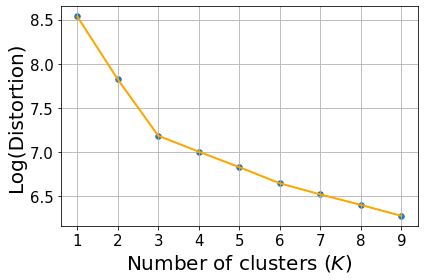

In [20]:
nk=[i+1 for i in K_range.flatten()]
plt.plot(nk, np.log(distortion), linewidth=2, color='orange')
plt.scatter(nk, np.log(distortion), s=30)
#plt.axvline(x=3.5, color='red', linestyle='--', dashes=(5,6), linewidth=2.5)
plt.xlabel('Number of clusters ($K$)', fontsize=20)
plt.ylabel('Log(Distortion)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig("Elbow.jpg")
plt.show()

<h4><p>It seems that, after k=3, the model starts to gain less and less knowledge about the system and must be overfitting it.
So we were correct in our initial guess. The best number of clusters to fit the data should be 3.</p></h4> 

<h3>DETERMINING THE ACCURACY OF THE K-MEANS MODEL</h3>
    
<h4><p>Let us now train a model and then test it by calculating its accuracy on the previous dataset.</p>    
<p>We'll start by dividing the data into a training and testing set and, after it, we'll perform bootstrapping on the training set by dividing it into 10 batches, for the sake of simplicity.</p></h4>

In [15]:
import random

def generate_random_sublists(n):
    result = [[random.uniform(-5,10), random.uniform(-5, 5)] for _ in range(n)]
    return result

def dist(L1,L2,length=2): #lists with the same length
    s=0
    for i in range(length):
        s+=(L1[i]-L2[i])**2
    return s**0.5

def avg_std(L):               #L is of the shape x rows and y collumns
    avg=[[0,0],[0,0],[0,0]]   #each entry has length z
    avg2=[[0,0],[0,0],[0,0]]  #average of squares
    std=[[0,0],[0,0],[0,0]]
    x=len(L)
    y=len(L[0])
    z=2 #len(L[0][0])
    
    for i in range(x):
        for j in range(y):
            avg[i][0]+=L[i][j][0]
            avg[i][1]+=L[i][j][1]
            avg2[i][0]+=(L[i][j][0])**2
            avg2[i][1]+=(L[i][j][1])**2
            
        avg[i][0]=avg[i][0]/y
        avg[i][1]=avg[i][1]/y
        avg2[i][0]=avg2[i][0]/y
        avg2[i][1]=avg2[i][1]/y
    
    for i in range(x):        
        std[i][0]=(abs(avg2[i][0] - (avg[i][0])**2))**0.5
        std[i][1]=(abs(avg2[i][1] - (avg[i][1])**2))**0.5
   
    return avg,std

def closer_centroid(L1,L2): #L1 is a list with shape [[L1_0],[L1_1],[L1_2]]
                            #L2 has shape [L2_0,L2_1,L2_2]
    d00 = dist(L2[0],L1[0][0])
    d01 = dist(L2[0],L1[1][0])
    d02 = dist(L2[0],L1[2][0])
    d10 = dist(L2[1],L1[0][0])
    d11 = dist(L2[1],L1[1][0])
    d12 = dist(L2[1],L1[2][0])
    d20 = dist(L2[2],L1[0][0])
    d21 = dist(L2[2],L1[1][0])
    d22 = dist(L2[2],L1[2][0])
    D=[[d00,d01,d02],[d10,d11,d12],[d20,d21,d22]]

    """ 
    ind_0=D.index(min(D[0]))  #this method was not working
    ind_1=D.index(min(D[1]))  
    ind_2=D.index(min(D[2]))
    """

    ind_0 = min(range(len(D[0])), key=D[0].__getitem__) #as kmeans does not attribute the same space for the same clusters eaxh time
    ind_1 = min(range(len(D[1])), key=D[1].__getitem__) #we have to check which centroid is part of which set, before we average them
    ind_2 = min(range(len(D[2])), key=D[2].__getitem__)

    L1[ind_0].append(L2[0])
    L1[ind_1].append(L2[1])
    L1[ind_2].append(L2[2])

####################################################################

In [48]:
train_set=[]
test_set=[]
indices=[]
t=0.3 #testing size

while len(test_set)<t*len(Period):
    m = random.randint(0,len(Period)-1)
    if m not in indices:
        indices.append(m)
        test_set.append([Period[m],Mass[m]])

        
for i in range(len(Period)):
    if i not in indices:
        train_set.append([Period[i],Mass[i]])

####################################################################
        
#determine the average centroids
num_clusters = 3

Lcenters=[[],[],[]]

for j in range(10):
    periodo=[]
    massa=[]
    for k in range(len(train_set)//10):
        m=random.randint(0,len(train_set)-1)
        periodo.append(train_set[m][0])
        massa.append(train_set[m][1])
        
    random_sublists = generate_random_sublists(num_clusters) #generate the initial centroids randomly
    X = np.array(list(zip(periodo, massa)))
    initial_centers = np.array(random_sublists)
    
    kmeans = KMeans(n_clusters=num_clusters, init=initial_centers, n_init=1)
    kmeans.fit(X)
    # Get the cluster centers and labels
    centers = kmeans.cluster_centers_
    
    #labels = kmeans.labels_
    if j==0:
        Lcenters[0].append(centers[0])
        Lcenters[1].append(centers[1])
        Lcenters[2].append(centers[2])
    else:
        closer_centroid(Lcenters,centers)
    
avg,std=avg_std(Lcenters)   #AVERAGE CENTROIDS AND THEIR STANDARD DEVIATION


print("length of the training set:",len(train_set))
print("length of the testing set:",len(test_set))
print("length of the batches for bootstrapping:",len(train_set)//10)

length of the training set: 1782
length of the testing set: 765
length of the batches for bootstrapping: 178


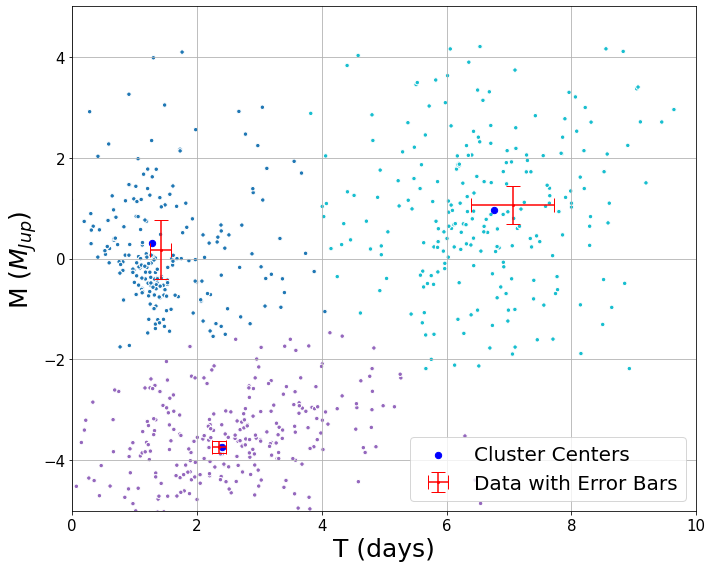

Average Training Centroid Coordinates: [[2.3546719430065064, -3.7399876720379925], [7.062378547113332, 1.056187881595893], [1.4177442116651322, 0.17763439478005583]] 

Standard Deviation of the coordinates: [[0.11769186948821755, 0.11547442239345547], [0.6661464482848564, 0.3746498085982865], [0.16827450958312345, 0.5894724648161384]] 

Testing Centroid Coordinates: [[ 6.75296665  0.9641568 ]
 [ 2.40734837 -3.72684494]
 [ 1.27388805  0.31284518]] 



In [49]:
#TESTING
plt.figure(figsize=(10,8))
period = [entry[0] for entry in test_set]
mass = [entry[1] for entry in test_set]

num_clusters = 3
random_sublists = generate_random_sublists(num_clusters)
X = np.array(list(zip(period, mass)))
initial_centers = np.array(random_sublists)

kmeans = KMeans(n_clusters=num_clusters, init=initial_centers, n_init=1)
kmeans.fit(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

AvgP=[i[0] for i in avg]
AvgM=[i[1] for i in avg]
StdP=[i[0] for i in std]
StdM=[i[1] for i in std]



# Plot the data points and cluster centers
plt.scatter(period, mass, c=labels, cmap='tab10_r', s=20, edgecolors='w')
plt.scatter(centers[:, 0], centers[:, 1], c='b', marker='o', s=40, label='Cluster Centers')
#plt.scatter(avg[:, 0], avg[:, 1], c='green', marker='o', s=30, label='Cluster Centers')
plt.errorbar(AvgP, AvgM, xerr=StdP, yerr=StdM, fmt='o', markersize=2, color='red', capsize=7, label='Data with Error Bars')
plt.ylabel(r"M ($M_{Jup}$)",fontsize=25)
plt.xlabel(r"T (days)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(loc='best', fontsize=20)
plt.grid()
plt.savefig("Errorbars_test"+str(t)+".jpg")
plt.tight_layout()
plt.show()

print("Average Training Centroid Coordinates:",avg,'\n')
print("Standard Deviation of the coordinates:",std,'\n')
print("Testing Centroid Coordinates:",centers,'\n')

<h4>As before, we need to make sure we are comparing the average centroid to the correct testing centroid, so that we can calculate the accuracy of the model</h4>

In [50]:
def closer_centroid_2(L1,L2): #L1 and L2 have the shape [Lx_0,Lx_1,Lx_2]
    
    new_L1=[[0],[0],[0]]
    
    d00 = dist(L2[0],L1[0])
    d01 = dist(L2[0],L1[1])
    d02 = dist(L2[0],L1[2])
    d10 = dist(L2[1],L1[0])
    d11 = dist(L2[1],L1[1])
    d12 = dist(L2[1],L1[2])
    d20 = dist(L2[2],L1[0])
    d21 = dist(L2[2],L1[1])
    d22 = dist(L2[2],L1[2])
    D=[[d00,d01,d02],[d10,d11,d12],[d20,d21,d22]]

    ind_0 = min(range(len(D[0])), key=D[0].__getitem__) #as kmeans does not attribute the same space for the same clusters eaxh time
    ind_1 = min(range(len(D[1])), key=D[1].__getitem__) #we have to check which centroid is part of which set, before we average them
    ind_2 = min(range(len(D[2])), key=D[2].__getitem__)

    new_L1[ind_0]=L2[0]
    new_L1[ind_1]=L2[1]
    new_L1[ind_2]=L2[2]
    
    return new_L1

new_centers = closer_centroid_2(avg,centers)
#print(avg,'\n',new_centers)

def Accuracy(Tset,centroids,average):
    outliers=0
    for k in Tset:
        d0_new=dist(k,centroids[0])
        d1_new=dist(k,centroids[1])
        d2_new=dist(k,centroids[2])
        D_new=[d0_new,d1_new,d2_new]
        index_new=D_new.index(min(D_new))

        d0_avg=dist(k,average[0])
        d1_avg=dist(k,average[1])
        d2_avg=dist(k,average[2])
        D_avg=[d0_avg,d1_avg,d2_avg]
        index_avg=D_avg.index(min(D_avg))
                            
        if index_new!=index_avg:
                            outliers+=1
    
    print("Number of outliers:",outliers)
    return outliers/len(Tset)

acc=Accuracy(test_set,new_centers,avg)
print("Accuracy of the model: "+str(100-np.round(acc*100,decimals=2))+'%')

Number of outliers: 8
Accuracy of the model: 98.95%


<h3>DBSCAN</h3>

<h4>Lets use DBSCAN

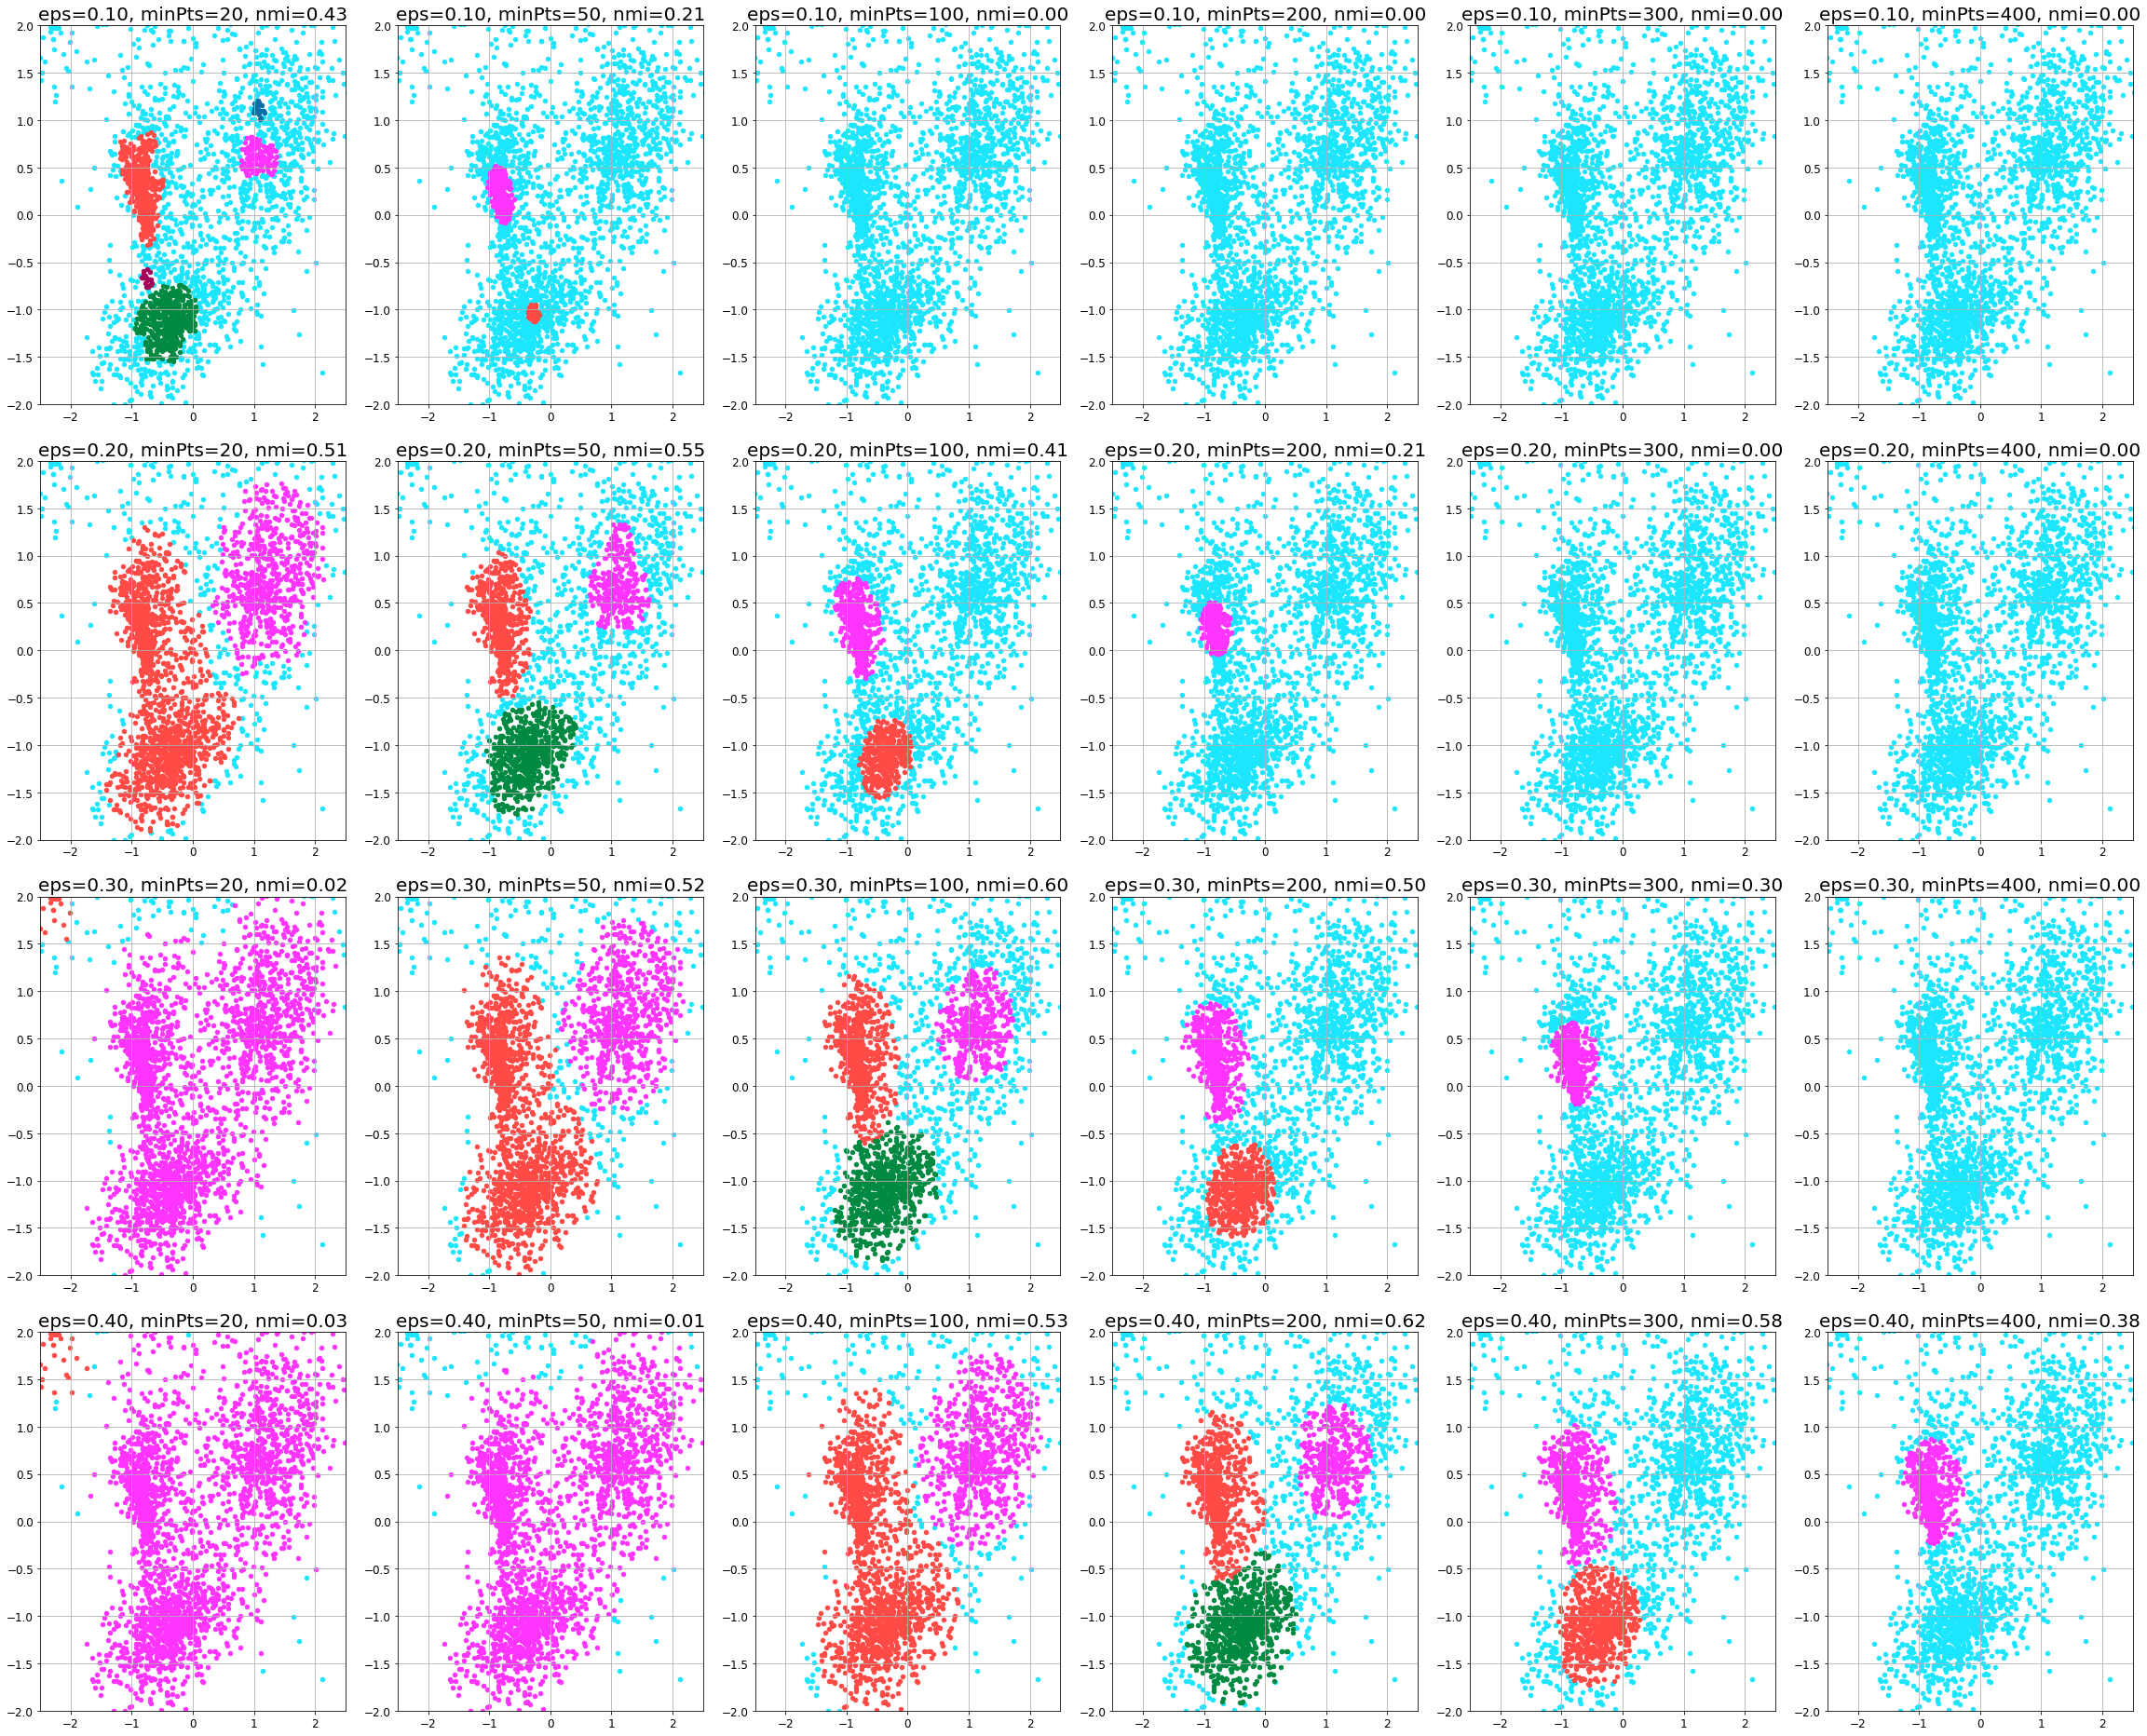

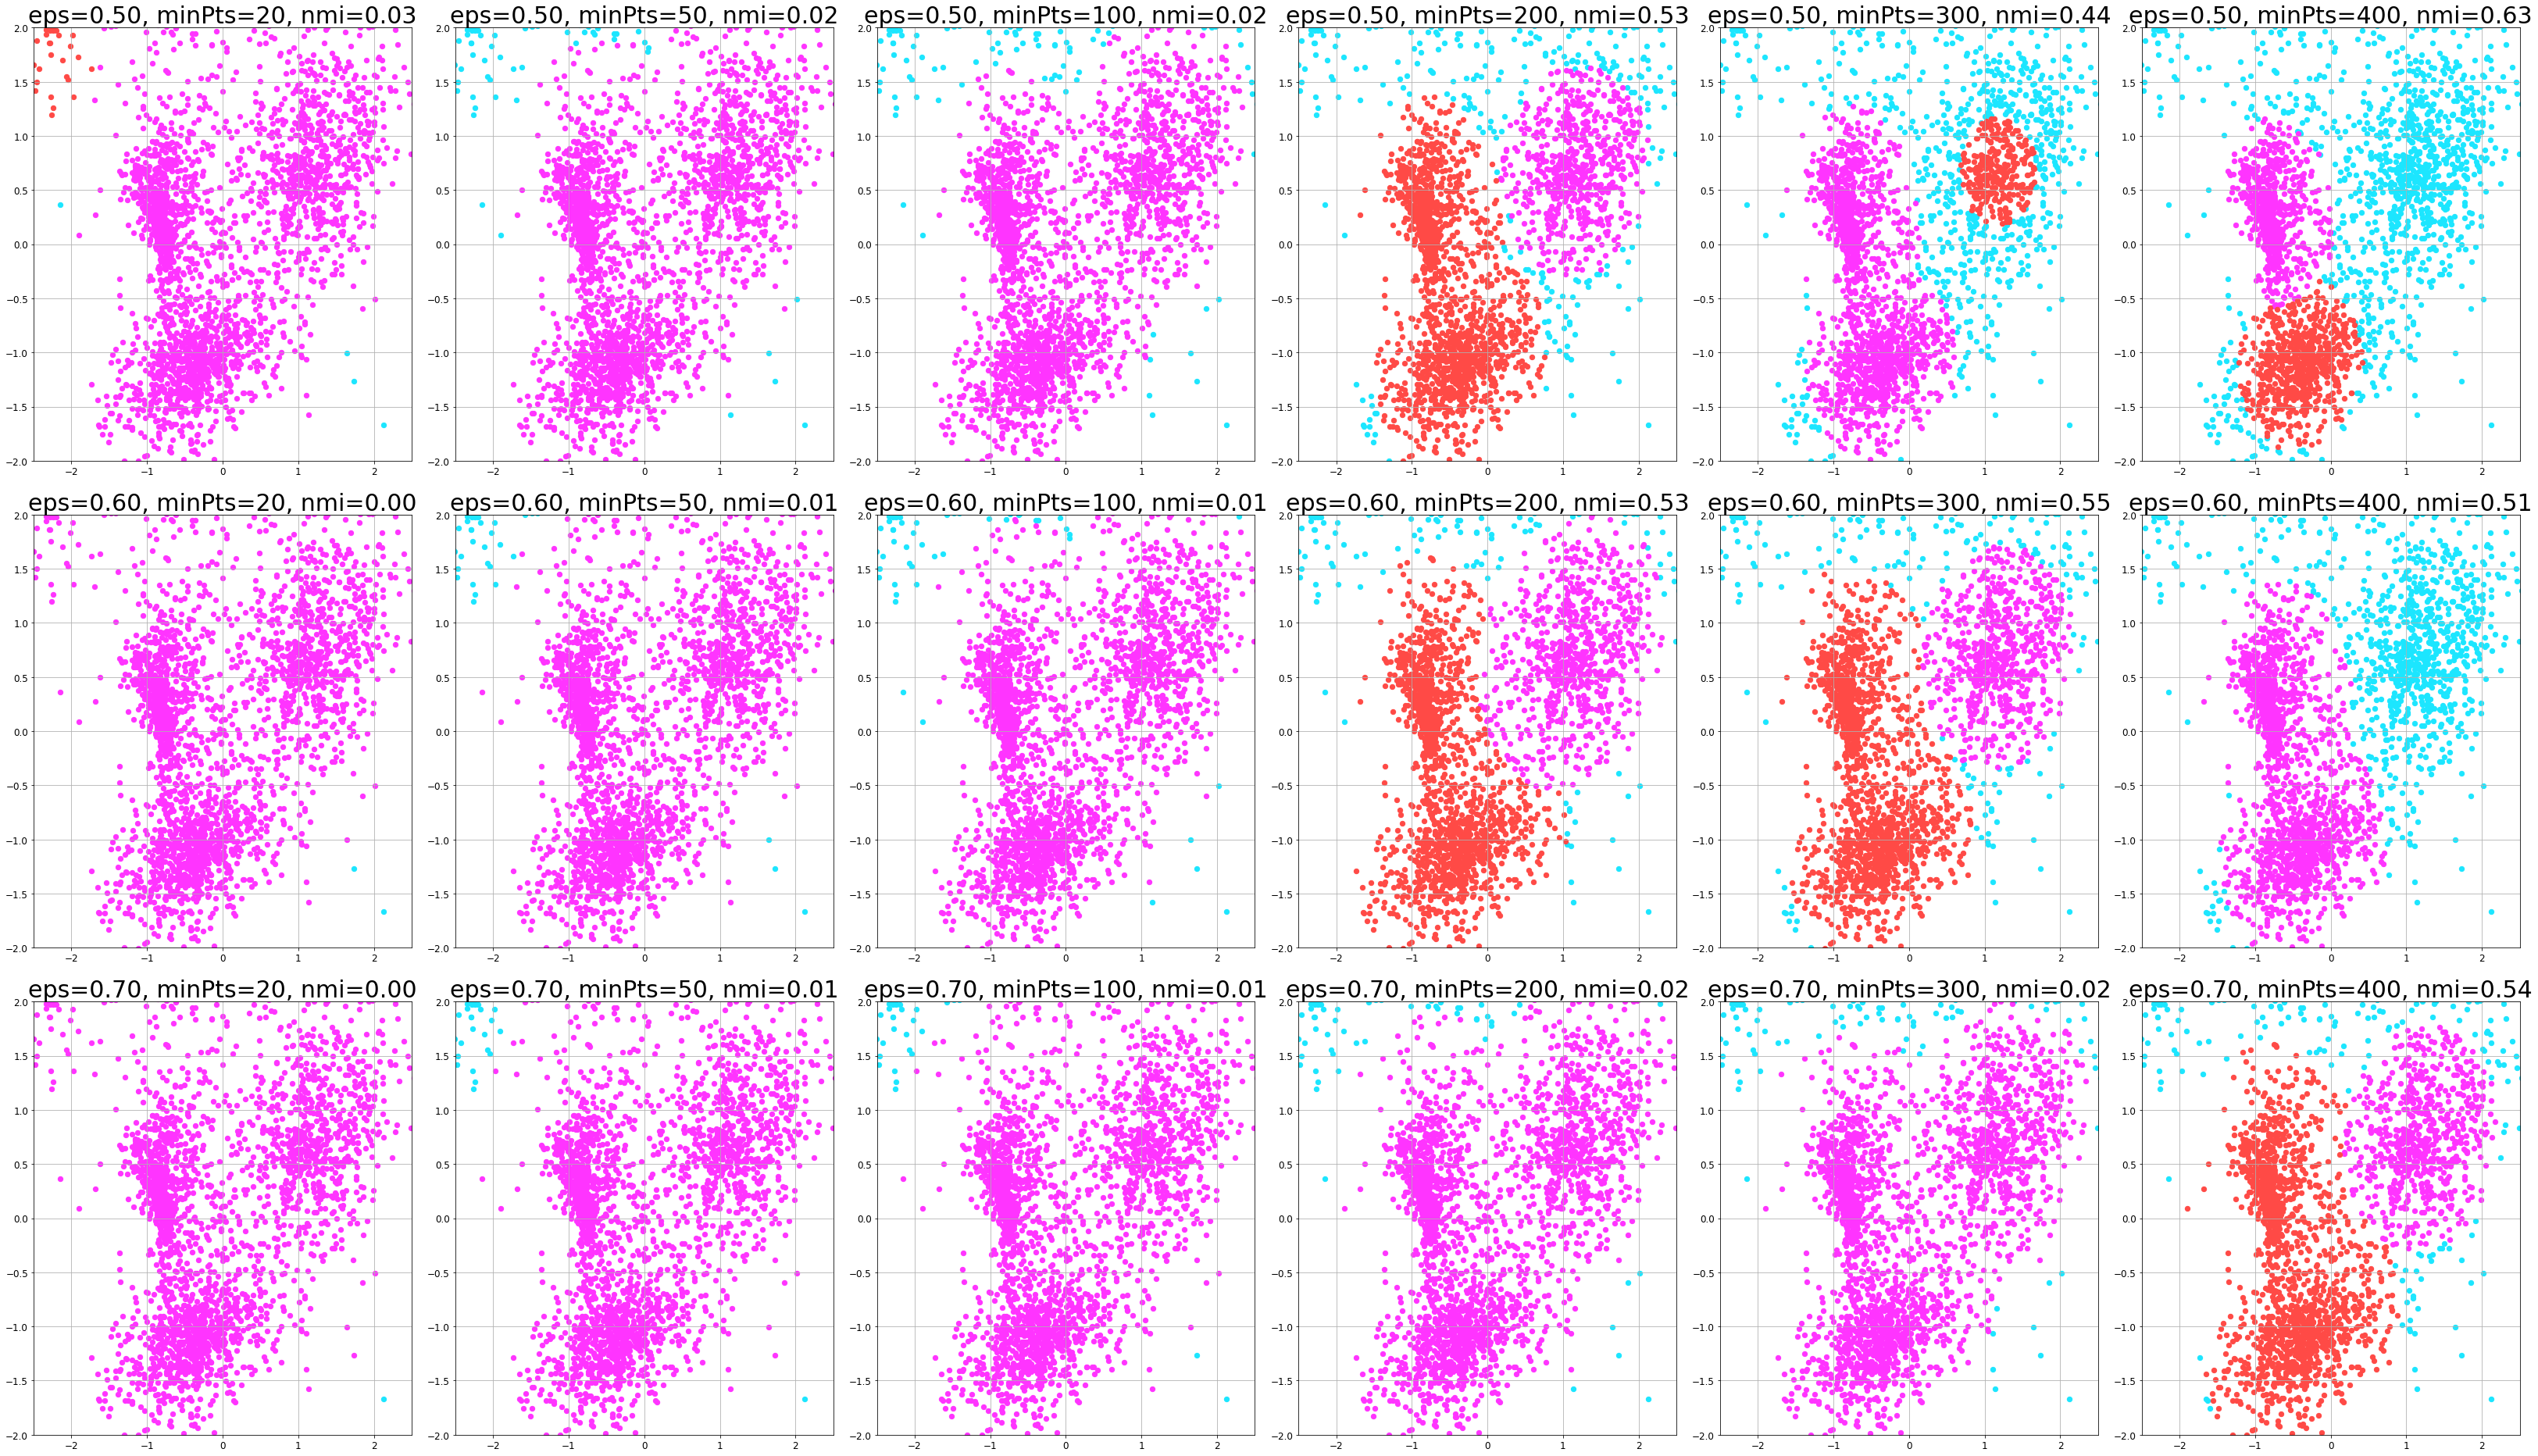

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def plotting_ax_2(X, y, ax, fontsize=12,S=20):
    # plotting function
    cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", 
                "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693",
                "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", 
                "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=S)
        ax.tick_params(axis='both', labelsize=15)
        #ax.tick_params(axis='both', which='minor', labelsize=8)
        
        

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(0)
#n_true_center=3
X, ytrue = (X_m,ypred)
X = StandardScaler().fit_transform(X)

eps_range_1 = [0.1,0.2,0.3,0.4]
eps_range_2 = [0.5,0.6,0.7]
min_sample_range = [20,50,100,200,300,400]

fig, ax = plt.subplots(len(eps_range_1),len(min_sample_range),figsize=(32,26))
for i, eps in enumerate(eps_range_1):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y = model.labels_
        plotting_ax_2(X,y,ax[i,j])
        nmi=NMI(y, ytrue)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi), fontsize=20)
        plt.subplots_adjust(top=1)
        #ax[i,j].set_ylabel(r"log(M) ($M_{Jup}$)",fontsize=20)
        #ax[i,j].set_xlabel(r"log(T) (days)",fontsize=20)
        ax[i,j].set_ylim(-2,2)
        ax[i,j].set_xlim(-2.5,2.5)
        ax[i,j].xaxis.set_tick_params('major',labelsize=12)
        ax[i,j].yaxis.set_tick_params('major',labelsize=12)
        ax[i,j].grid()
plt.tight_layout(h_pad=2, w_pad=2)
#plt.tight_layout()
plt.savefig("DBSCAN_1.jpg")
plt.show()

#############

fig, ax = plt.subplots(len(eps_range_2),len(min_sample_range),figsize=(45,26))
for i, eps in enumerate(eps_range_2):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y = model.labels_
        plotting_ax_2(X,y,ax[i,j],S=40)
        nmi=NMI(y, ytrue)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi), fontsize=30)
        plt.subplots_adjust(top=1)
        #ax[i,j].set_ylabel(r"log(M) ($M_{Jup}$)",fontsize=20)
        #ax[i,j].set_xlabel(r"log(T) (days)",fontsize=20)
        ax[i,j].set_ylim(-2,2)
        ax[i,j].set_xlim(-2.5,2.5)
        ax[i,j].xaxis.set_tick_params('major',labelsize=12)
        ax[i,j].yaxis.set_tick_params('major',labelsize=12)
        ax[i,j].grid()
plt.tight_layout(h_pad=2, w_pad=2)
#plt.tight_layout()
plt.savefig("DBSCAN_2.jpg")
plt.show()
